

 Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. 
 
 The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in

In [2]:
def print_first_point(filename):
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    path = r"F:\BikeDataProject\BikeDataCVS\{}".format(filename)
    with open(path) as f_in:
        trip_reader = csv.DictReader(f_in)
        first_trip = next(trip_reader)
        pprint(first_trip)
    return (city, first_trip)

data_files = ['NYC-CitiBike-2016.csv',
              'Chicago-Divvy-2016.csv',
              'Washington-CapitalBikeshare-2016.csv',]


example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip





City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    # YOUR CODE HERE
    duration = 0
    if city == 'Washington':
        duration = float(datum['Duration (ms)'])/(1e3*60)
    else:
  
        duration = float(datum['tripduration'])/60
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
# helper function to extract month, hour and day of week
def extract_date(string, city):
    # 'NYC start time include second, so it has different format"
    if city == 'NYC':
        date_time = datetime.strptime(string,'%m/%d/%Y %H:%M:%S')
    else:
        date_time = datetime.strptime(string,'%m/%d/%Y %H:%M')
    month     = int(date_time.strftime('%m'))
    hour      = int(date_time.strftime('%H'))
    day_of_week = date_time.strftime("%A")
    #print("\nMonth = {} \nHour = {} \nday_of_week = {}".format(month,hour,day_of_week))
    return (month, hour, day_of_week)


def time_of_trip(datum, city):

    city_name = city
    # YOUR CODE HERE
    if city == 'Washington':
        month, hour, day_of_week = extract_date(datum["Start date"],city_name)
    else:
        month, hour, day_of_week = extract_date(datum["starttime"],city_name)
        
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]


In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if city == 'Washington':
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    else:
        user_type = datum['usertype']
    #print("city = {}, user_type = {}".format(city,user_type))
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

Question 3b: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the /examples/ folder, you will see an example datafile from the Bay Area Bike Share before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    # creat the path to open and write the file
    path_out = r"F:\BikeDataProject\BikeDataCVS\{}".format(out_file)
    path_in = r"F:\BikeDataProject\BikeDataCVS\{}".format(in_file)
    with open(path_out, 'w') as f_out, open(path_in, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
        

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}
            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.  
            new_point['duration'] = duration_in_mins(row, city) 
            month, hour, day_of_week = time_of_trip(row, city)
            new_point['month']   = month
            new_point['hour']    = hour
            new_point['day_of_week'] = day_of_week
            new_point['user_type'] = type_of_user(row, city)            
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.     
            
            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            
            
            
            
            
            
            
            
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': 'Washington-CapitalBikeshare-2016.csv',
                            'out_file': 'Washington-2016-Summary.csv'},
             'Chicago': {'in_file': 'Chicago-Divvy-2016.csv',
                         'out_file': 'Chicago-2016-Summary.csv'},
             'NYC': {'in_file': 'NYC-CitiBike-2016.csv',
                     'out_file': 'NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


In [8]:
def number_of_trips(filename):
    """
    After modification
    This function reads in a file with trip data and reports total of trip made
    by suscriber and customer, and the proportion of trip made by each customer
    type
    """
    path = r"F:\BikeDataProject\BikeDataCVS\{}".format(filename)
    with open(path, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        # compute proportion of trips made by subscriberss
        p_subscribers = n_subscribers/n_total
        # compute proportion of trips made by customers
        p_customers = n_customers/n_total
        
        # return tallies as a tuple
        return(p_subscribers, p_customers, n_total, n_subscribers, n_customers)

In [9]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

cities_data = {'Washington':'Washington-2016-Summary.csv',
              'Chicago':'Chicago-2016-Summary.csv',
               'NYC':'NYC-2016-Summary.csv'}

# total_cities,P_sub,P_cus contain each city's approriate value
total_city = {}; P_sub = {} ; P_cus = {}
for city in cities_data:
    data_file = cities_data[city]
    p_subscribers, p_customers, n_total = number_of_trips(data_file)[:3]
    # put value in correct cartegory
    P_sub[city] = p_subscribers; P_cus[city] = p_customers; total_city[city] = n_total

#find the max value for each category
max_total = max(total_city, key = total_city.get)
print('{} has the highest number of trips that is {}'.format(max_total,total_city[max_total]))
maxP_sub = max(P_sub, key = P_sub.get)
print('{} has the highest subscriber propotion that is {}'.format(maxP_sub,P_sub[maxP_sub]))
maxP_cus = max(P_cus, key = P_cus.get)
print('{} has the highest customer propotion that is {}'.format(maxP_cus,P_cus[maxP_cus]))             

print('\n')
print('Total trip:')
print(total_city)
print("Subsribers_proportion:")
print(P_sub)
print("Customers_proportion")
print(P_cus)

NYC has the highest number of trips that is 276798
NYC has the highest subscriber propotion that is 0.8883590199351151
Chicago has the highest customer propotion that is 0.23774798630269925


Total trip:
{'Washington': 66326, 'Chicago': 72131, 'NYC': 276798}
Subsribers_proportion:
{'Washington': 0.7802822422579381, 'Chicago': 0.7622520136973008, 'NYC': 0.8883590199351151}
Customers_proportion
{'Washington': 0.21971775774206193, 'Chicago': 0.23774798630269925, 'NYC': 0.11164098006488486}


Question 4b: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

In [10]:
# these functions are used to answer question 4b
# this function return the average strip lenght for each city
# and proprotion of rides that are longer than 30 minutes
def averageNpro30_duration(filename):
    path = r"F:\BikeDataProject\BikeDataCVS\{}".format(filename)
    with open(path,'r') as f_in:
        #set up csv reader object
        reader = csv.DictReader(f_in)
        #d_total is the total trip duration in the city
        #countL is number of trips longer than 30
        #countT is totaol trip
        d_total = 0 ; countL= 0; countT = 0
        for row in reader:
            time_trip = float(row['duration'])
            d_total += time_trip
            countT += 1
            if time_trip > 30:
                countL += 1
        #calculate average duration and  proportion of ride greater
        # longer 30 minutes
        avg_duration = d_total/countT
        pro_greater30 = countL/countT
        return (avg_duration,pro_greater30)

In [11]:
W_avgDuration, W_pro30  = averageNpro30_duration(cities_data['Washington'])
C_avgDuration, C_pro30  = averageNpro30_duration(cities_data['Chicago'])
N_avgDuration, N_pro30  = averageNpro30_duration(cities_data['NYC'])
print('Washington average_trip_length is  {} min'.format(W_avgDuration))
print('Washington proportion of ride longer than 30 min is {}  \n'.format(W_pro30))
print('Chicago average_trip_length is  {}'.format(C_avgDuration))
print('Chicago proportion of ride longer than 30 min is {}  \n'.format(C_pro30))
print('NYC average_trip_length is  {}'.format(N_avgDuration))
print('NYC proportion of ride longer than 30 min is {} '.format(N_pro30))

Washington average_trip_length is  18.93287355913721 min
Washington proportion of ride longer than 30 min is 0.10838886711093688  

Chicago average_trip_length is  16.563629368787335
Chicago proportion of ride longer than 30 min is 0.08332062497400562  

NYC average_trip_length is  15.81259299802294
NYC proportion of ride longer than 30 min is 0.07302437156337835 


Question 4c: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

In [12]:
# this funtion will return average trip duration of subscribers and customber
def avg_subNcus_duration(filename):
    path = r"F:\BikeDataProject\BikeDataCVS\{}".format(filename)
    with open(path,'r') as f_in:
        #set up csv reader object
        reader = csv.DictReader(f_in)
        #total trips made by subscriber and customer respectively
        n_subscribers, n_customers = number_of_trips(filename)[3:]
        d_subscribers, d_customers = 0, 0
        #find the total duration for each customer type
        for row in reader:
            time = float(row['duration'])
            if row['user_type'] == 'Subscriber':
                d_subscribers += time
            else:
                d_customers += time
        # find the average trip duration
        avg_subDura = d_subscribers/n_subscribers
        avg_cusDura = d_customers/n_customers
        return (avg_subDura,avg_cusDura)

# this funtion will compare average duration ride of subscribers and customers
def the_best_user_type(city_name,avg_subDura,avg_cusDura):
    n = city_name; s = avg_subDura ; c = avg_cusDura
    m2 = "The avearge subscriber trip is {} min, while the avearge customer trip is {} min.\n".format(s,c)
    if avg_subDura > avg_cusDura:
        m1 = "In {} subscriber takes longer ride on average than customers \n".format(n)
        message = m1 + m2
    elif avg_subDura < avg_cusDura: 
        m1 = "In {} customers takes longer ride on average than subscriber \n".format(n)
        message = m1 + m2
    else:
        message = "there are no best user type"
    return message


In [13]:
W_avg_subDura, W_avg_cusDura  = avg_subNcus_duration(cities_data['Washington'])
print(the_best_user_type('Washington,',W_avg_subDura,W_avg_cusDura))

C_avg_subDura, C_avg_cusDura  = avg_subNcus_duration(cities_data['Chicago'])
print(the_best_user_type('Chicago,',C_avg_subDura,C_avg_cusDura))

N_avg_subDura, N_avg_cusDura  = avg_subNcus_duration(cities_data['NYC'])
print(the_best_user_type('NYC,',N_avg_subDura,N_avg_cusDura))

In Washington, customers takes longer ride on average than subscriber 
The avearge subscriber trip is 12.528120499294745 min, while the avearge customer trip is 41.67803139252976 min.

In Chicago, customers takes longer ride on average than subscriber 
The avearge subscriber trip is 12.067201690250076 min, while the avearge customer trip is 30.979781133982506 min.

In NYC, customers takes longer ride on average than subscriber 
The avearge subscriber trip is 13.680790523907177 min, while the avearge customer trip is 32.77595139473187 min.



In [14]:
# load library
import matplotlib.pyplot as plt
import numpy as np
# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

In [15]:
# durationT contains trip duration of subscibers and  customers
# durationC contains only trip duration of customers
durationT = [] ; durationC =[]
filename = cities_data['Washington']
path = r"F:\BikeDataProject\BikeDataCVS\{}".format(filename)
with open(path,'r') as f_in:
    #set up csv reader object
    reader = csv.DictReader(f_in)
    for row in reader:
        time = float(row['duration'])
        durationT.append(time)
        if row['user_type'] == 'Customer':
            durationC.append(time)
print("length of durationT = {} \n".format(len(durationT)))
print("min_durationT = {}".format(min(durationT)))
print("max_durationT = {} \n".format(max(durationT)))
print("length of durationC = {} \n".format(len(durationC)))
print("min_durationC = {}".format(min(durationC)))
print("max_durationC = {} ".format(max(durationC)))


length of durationT = 66326 

min_durationT = 1.01055
max_durationT = 1422.5163666666667 

length of durationC = 14573 

min_durationC = 1.0245
max_durationC = 1422.5163666666667 


If you followed the use of the .hist() and .show() functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the .hist() function to limit the range of data that is plotted. Documentation for the function can be found [here].
https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

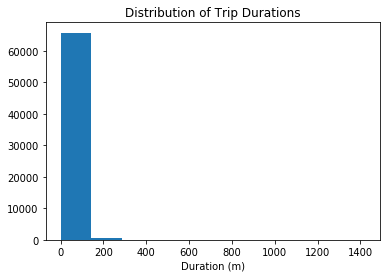

In [16]:
# Historgram of time distribution
plt.hist(durationT)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

This site is excellent for questions like that: https://stackoverflow.com/questions/42741687/python-histogram-outline

'k' is shorthand for 'black' (you can use either).

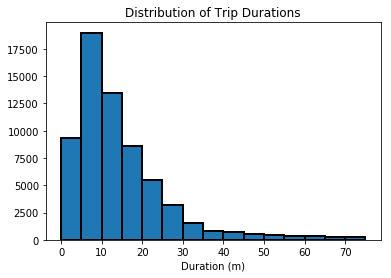

In [17]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
# Historgram of time distribution
## Use this and additional cells to answer Question 5. ##
binwidth = 5;
bins = range(0, 80,binwidth)
plt.hist(durationT, bins, range = [1 , 75],edgecolor = "K", linewidth = 2 )
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()


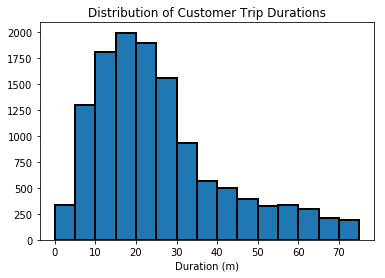

In [18]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
# Historgram of time distribution
## Use this and additional cells to answer Question 5. ##
binwidth = 5;
bins = range(0, 80,binwidth)
plt.hist(durationC, bins, range = [1 , 75],edgecolor = "K", linewidth = 2 )
plt.title('Distribution of Customer Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

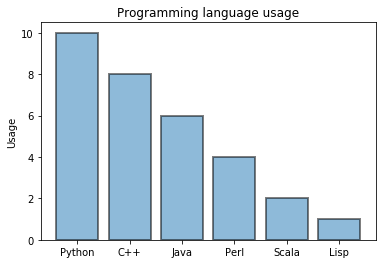

In [19]:
# Example of a bar graph
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha= 0.5,edgecolor = "K", linewidth = 2)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

In [20]:
# this funtion will return the total of trips in the month
def trip_by_moth(filename, month):
    path = r"F:\BikeDataProject\BikeDataCVS\{}".format(filename)
    with open(path,'r') as f_in:
        #set up csv readerobject
        reader = csv.DictReader(f_in)
        # monthT is the total of trip of that month
        monthT = 0
        for row in reader:
            if row['month'] == month:
                monthT += 1
    return monthT

# return a dictionary with month as key, and value is the number of trip
# in that month
def trip_of_year(filename):
    months= range(1,13) #months in a year
    year_trip = {}
    for month in months:
        str_month = str(month)
        trip = trip_by_moth(filename, str_month)
        year_trip[str_month] = trip
    return year_trip
    

In [21]:
def plot_bar(filename):
    city = filename.split('-')[0]#.split('/')[-1]
    # Dictionary is used to make sure to label the numner of trip with month
    trip_year = trip_of_year(filename)
    distances = []
    for month in trip_year:
        distances.append(trip_year[month])
    #Graph the bar charge
    months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June','Jul','Aug','Sept','Oct','Nov','Dec')
    y_pos = np.arange(len(months))
    plt.bar(y_pos, distances, align='center', alpha= 0.5,edgecolor = "K", linewidth = 2)
    plt.xticks(y_pos, months)
    plt.ylabel('Number of Trips')
    plt.xlabel('Months')
    plt.title('{} Trips of year'.format(city))
    plt.show()



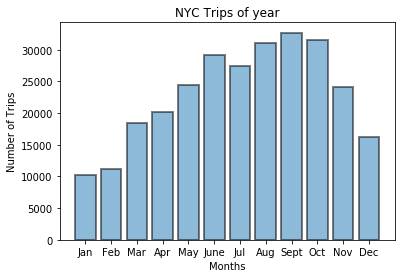

In [22]:
filename = cities_data['NYC']
plot_bar(filename)

In [23]:
filename = cities_data['NYC']
# Dictionary is used to make sure to label the numner of trip with month
trip_year = trip_of_year(filename)
# extract values from dict
NYC_distances = []
for month in trip_year:
    NYC_distances.append(trip_year[month])
print(NYC_distances)

[10180, 11170, 18413, 20160, 24455, 29242, 27522, 31104, 32699, 31519, 24148, 16186]


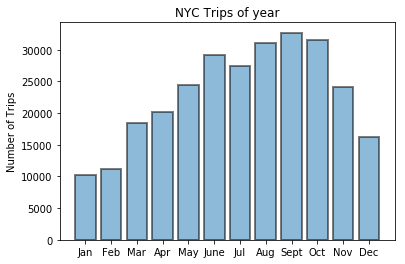

In [24]:
#Display each month trip on graph bar
months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June','Jul','Aug','Sept','Oct','Nov','Dec')
y_pos = np.arange(len(months))

plt.bar(y_pos, NYC_distances, align='center', alpha= 0.5,edgecolor = "K", linewidth = 2)
plt.xticks(y_pos, months)
plt.ylabel('Number of Trips')
plt.title('NYC Trips of year')
 
plt.show()

In [25]:
import pandas as pd
filename = cities_data['NYC']
path = r"F:\BikeDataProject\BikeDataCVS\{}".format(filename)
print(path + "\n")
df = pd.read_csv(path)
# head() is a useful function you can call on your dataframe to display the first few rows. 
# Let's use it to see what this data looks like.
df.head()

F:\BikeDataProject\BikeDataCVS\NYC-2016-Summary.csv



,duration,month,hour,day_of_week,user_type
0,13.983333,1,0,Friday,Customer
1,11.433333,1,0,Friday,Subscriber
2,5.250000,1,0,Friday,Subscriber
3,12.316667,1,0,Friday,Subscriber
4,20.883333,1,0,Friday,Customer
